In [1]:
%load_ext autoreload
%autoreload 2
import gc
import re
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
HOME = os.path.expanduser("~")
sys.path.append(f'{HOME}/kaggle/data_analysis/library')
import utils
from utils import get_categorical_features, get_numeric_features
import datetime

from tqdm import tqdm
import time
import sys

os.listdir('../input/')
key = 'card_id'
target = 'target'
ignore_list = [key, target, 'merchant_id', 'first_avtive_month']

In [ ]:
df_train = utils.read_df_pkl('../input/train0*')
df_test = utils.read_df_pkl('../input/test0*')
df_train.set_index(key, inplace=True)
df_test.set_index(key, inplace=True)
df_hist = utils.read_df_pkl('../input/hist_clean_*')
df_new = utils.read_df_pkl('../input/new_clean_*')
df_hist.set_index(key, inplace=True)
df_new.set_index(key, inplace=True)

df_train = reduce_mem_usage(df_train)
df_test  = reduce_mem_usage(df_test )
df_hist  = reduce_mem_usage(df_hist )
df_new   = reduce_mem_usage(df_new  )
train_test = pd.concat([df_train, df_test], axis=0)
df_hist = df_hist.merge(train_test, how='inner', on=key)
df_new = df_new.merge(train_test, how='inner', on=key)

100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


Mem. usage decreased to  4.04 Mb (56.2% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)
Mem. usage decreased to 2332.15 Mb (0.0% reduction)
Mem. usage decreased to 168.49 Mb (0.0% reduction)


2017-1
17.67571588
-33.21928095


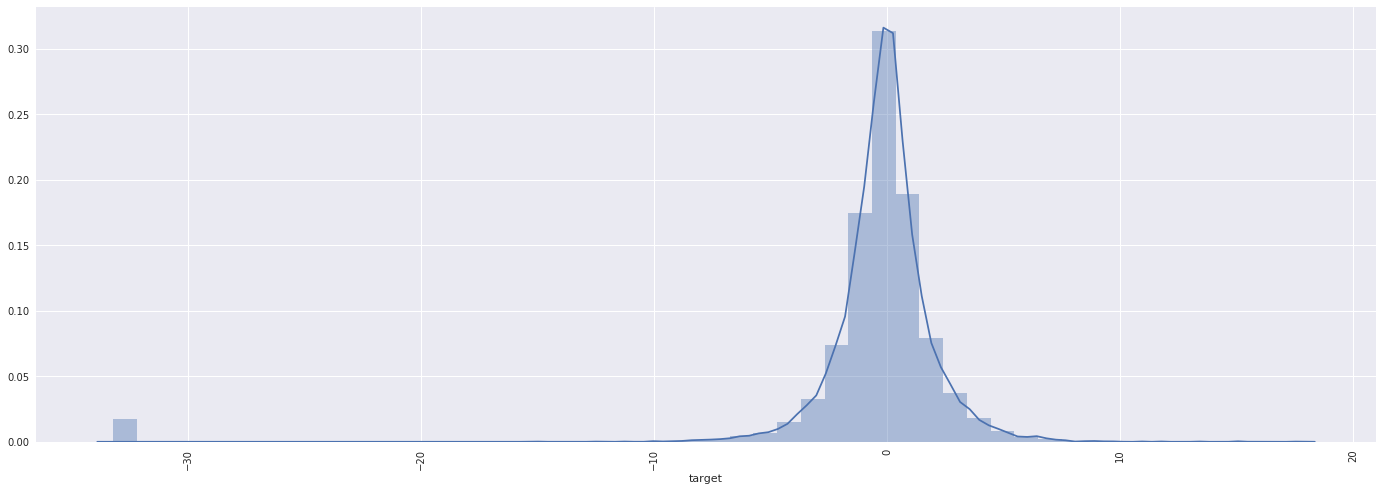

2017-2
15.99445509
-33.21928095


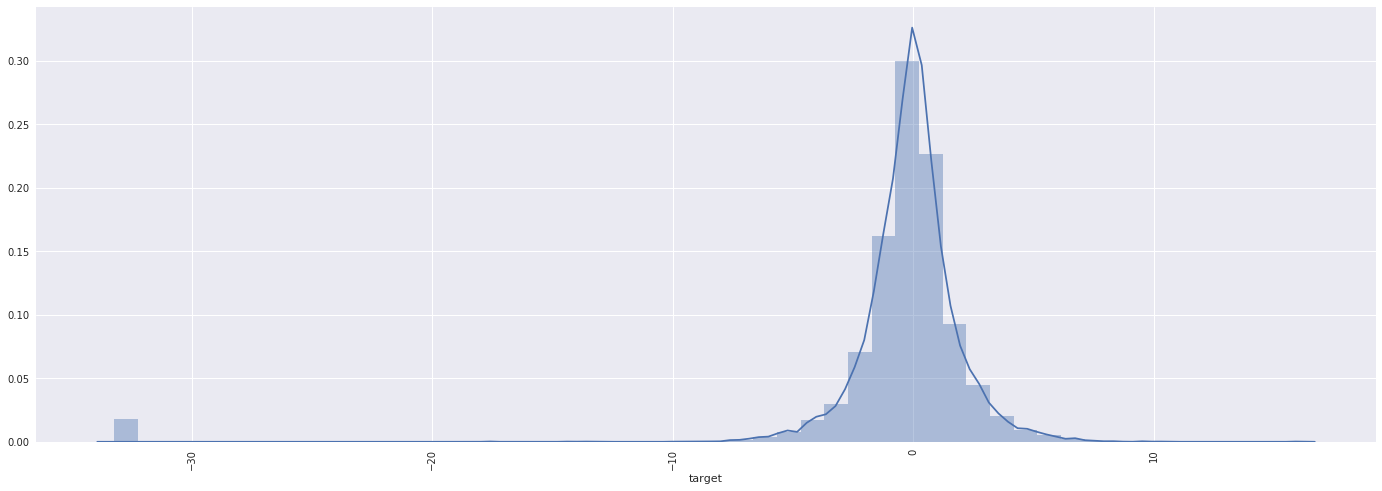

2017-3
12.74399286
-33.21928095


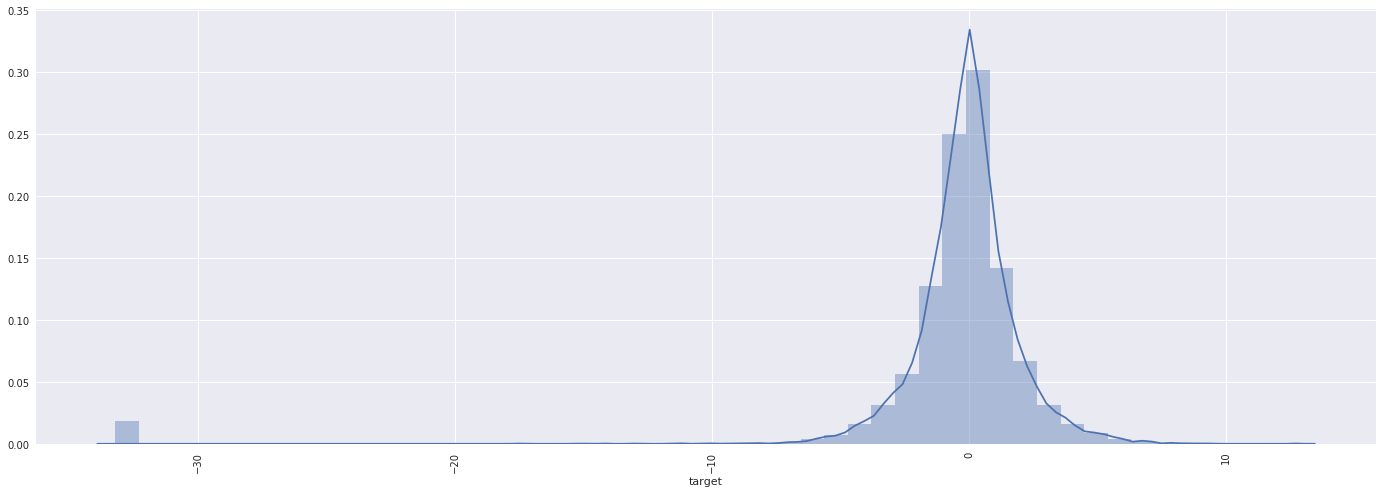

2017-4
10.85337194
-33.21928095


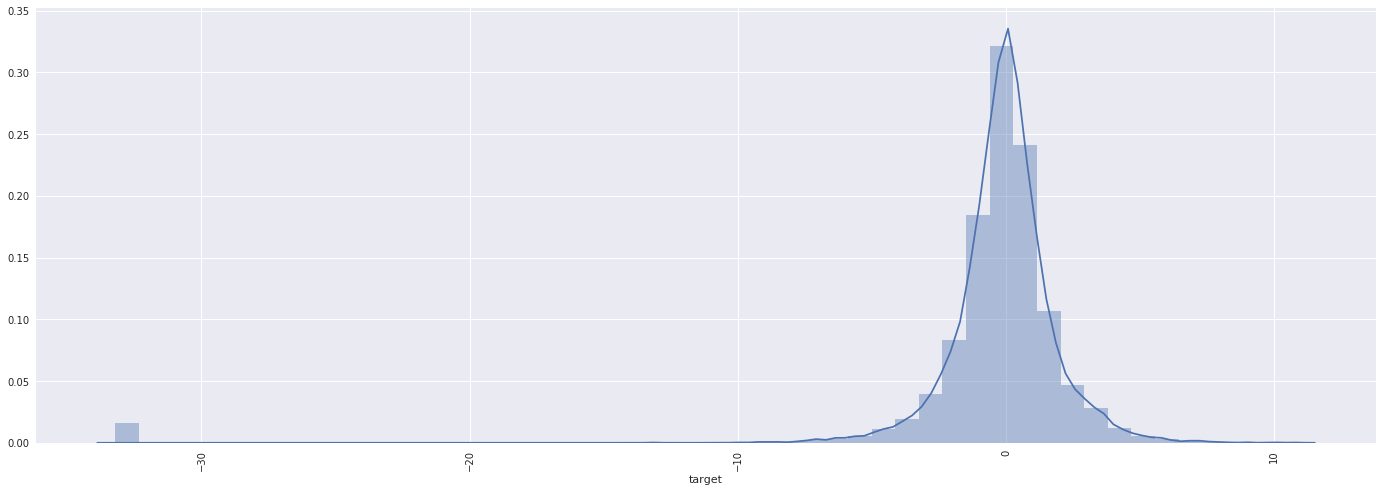

2017-5
17.9650684
-33.21928095


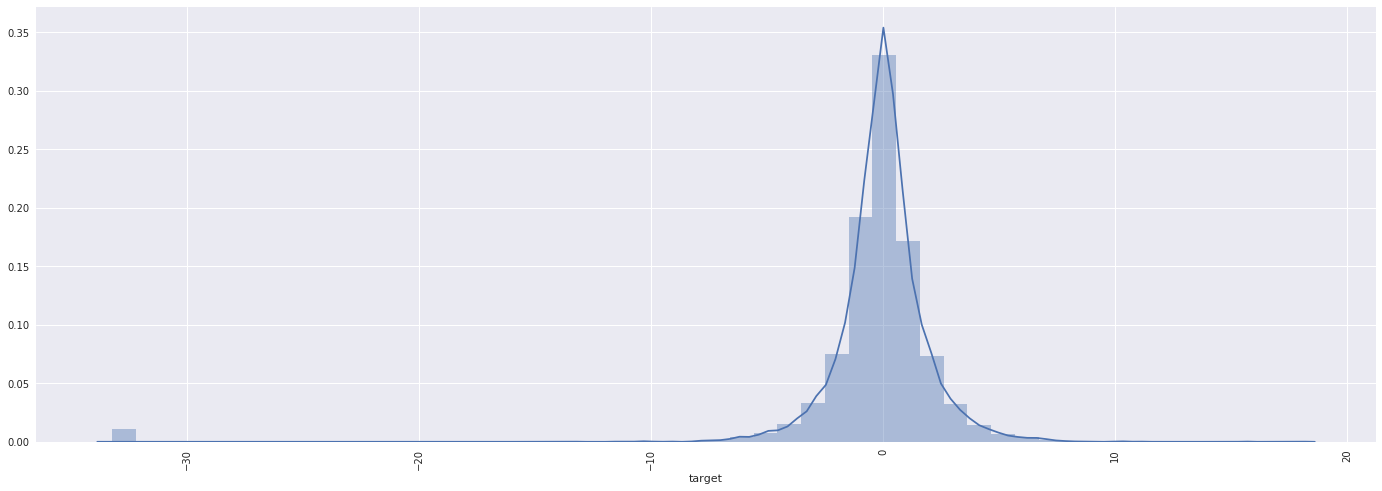

2017-6
13.31061278
-33.21928095


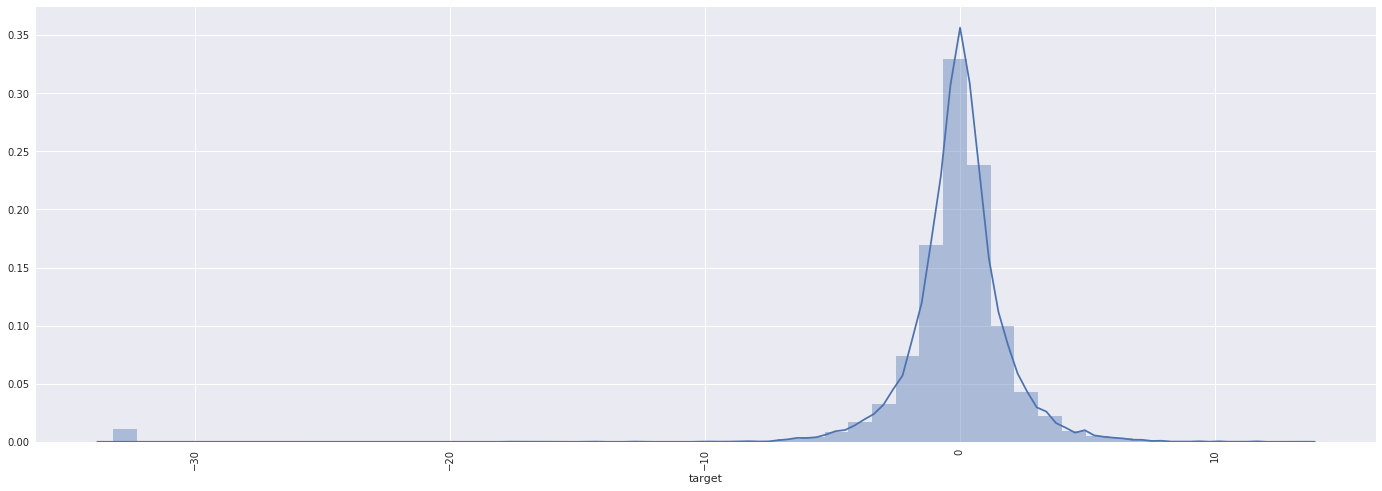

2017-7
10.99541385
-33.21928095


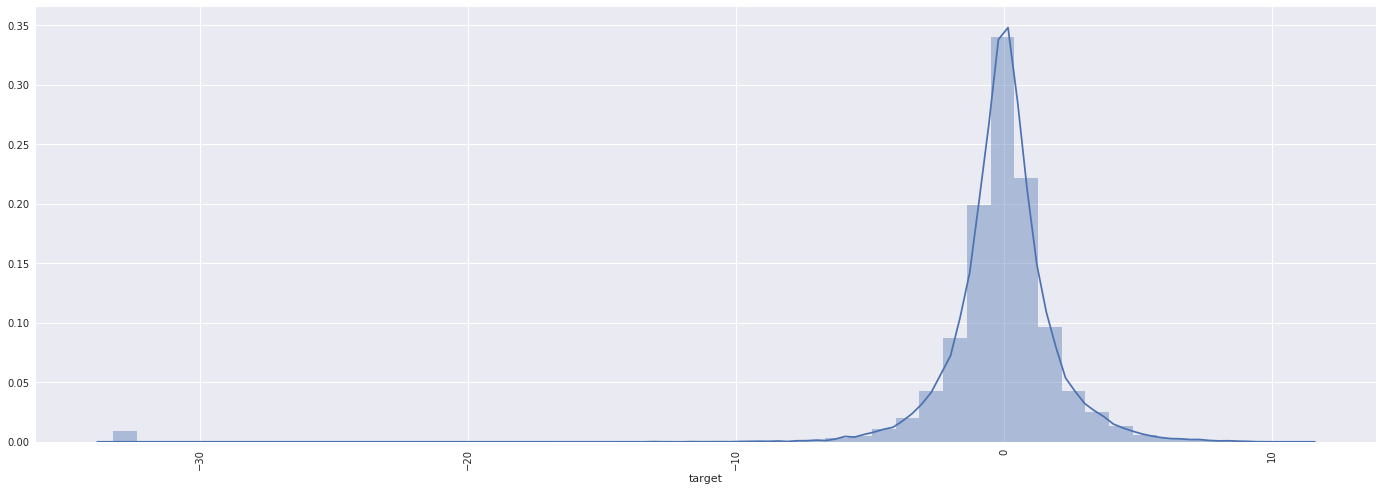

2017-8
14.85516048
-33.21928095


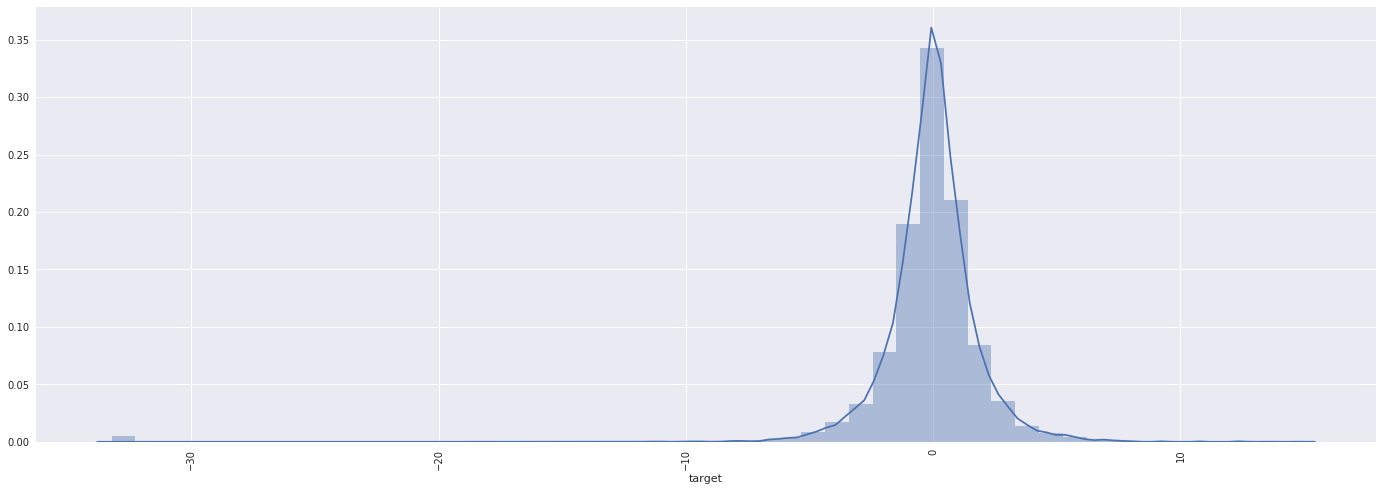

2017-9
13.60232191
-33.21928095


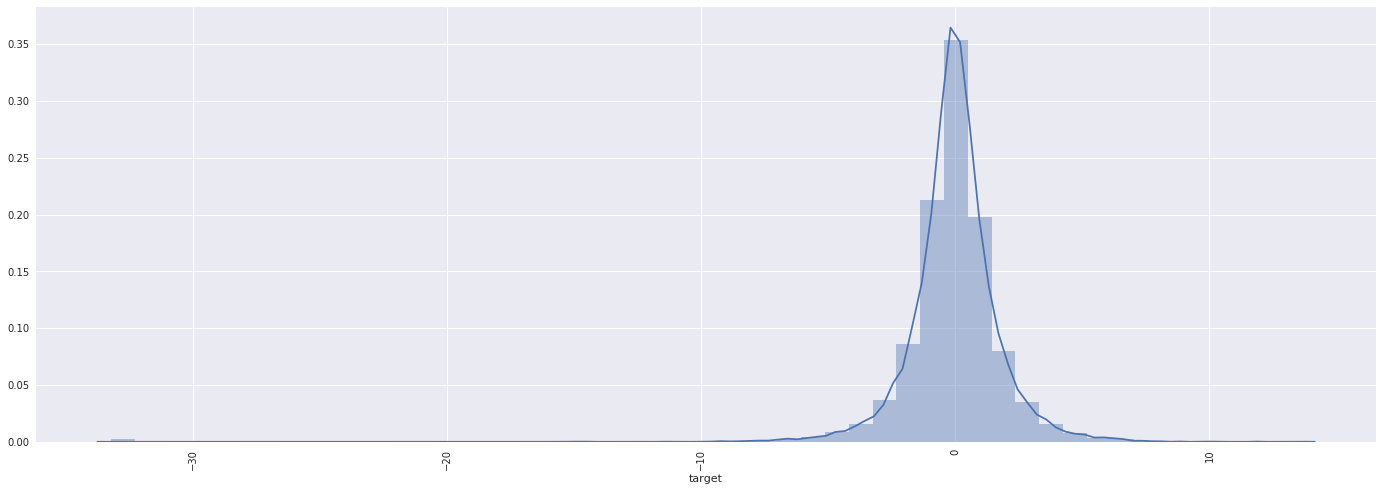

2017-10
12.97039354
-33.21928095


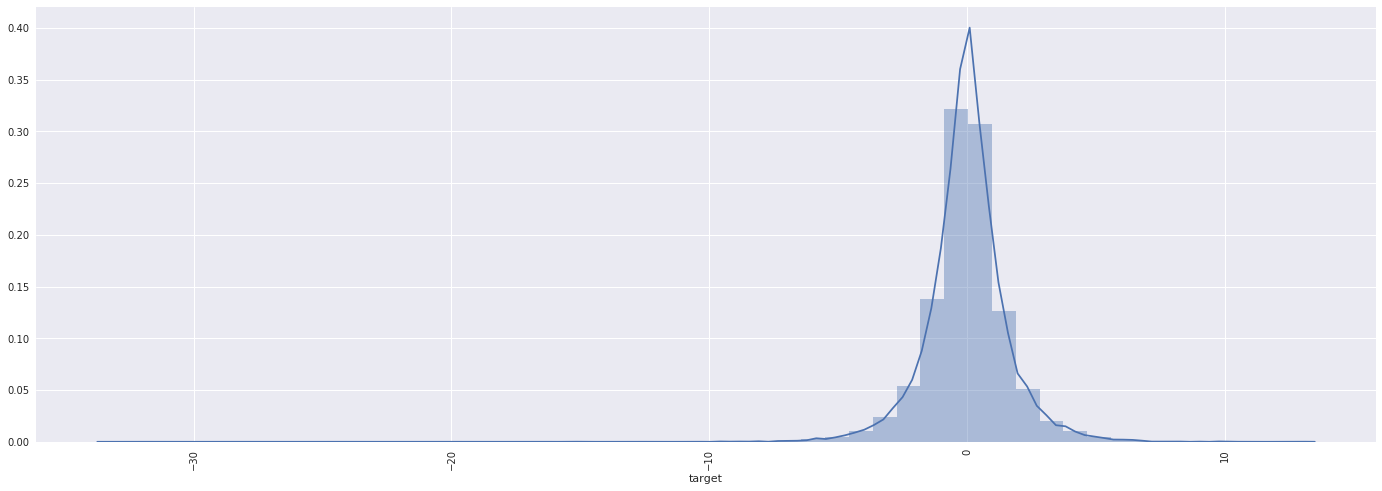

2017-11
11.6065579
-14.03637397


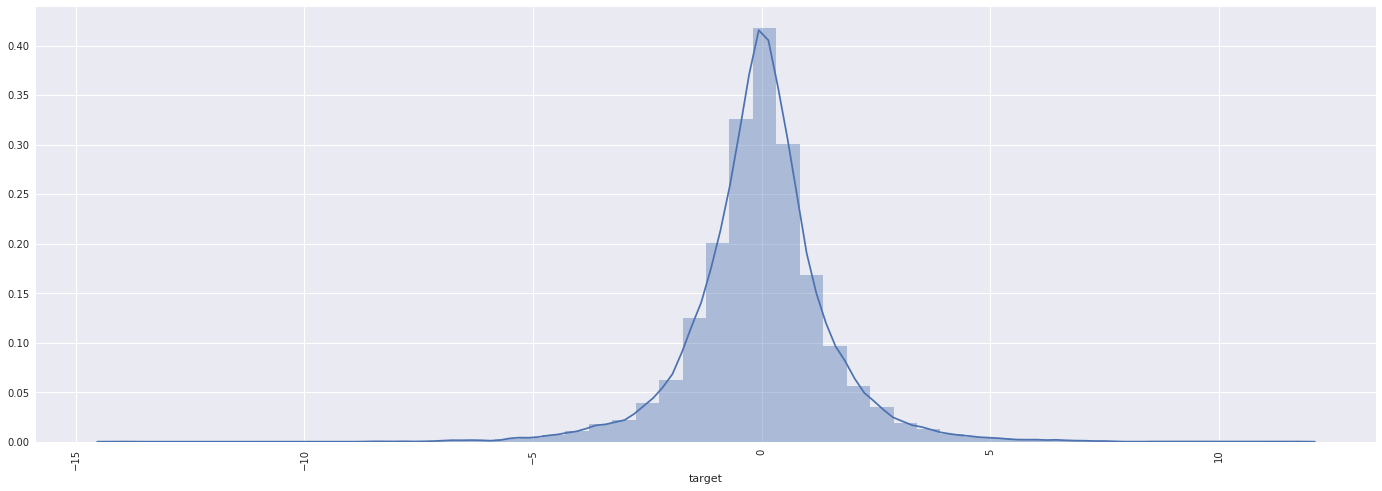

2017-12
8.22246197
-9.17629539


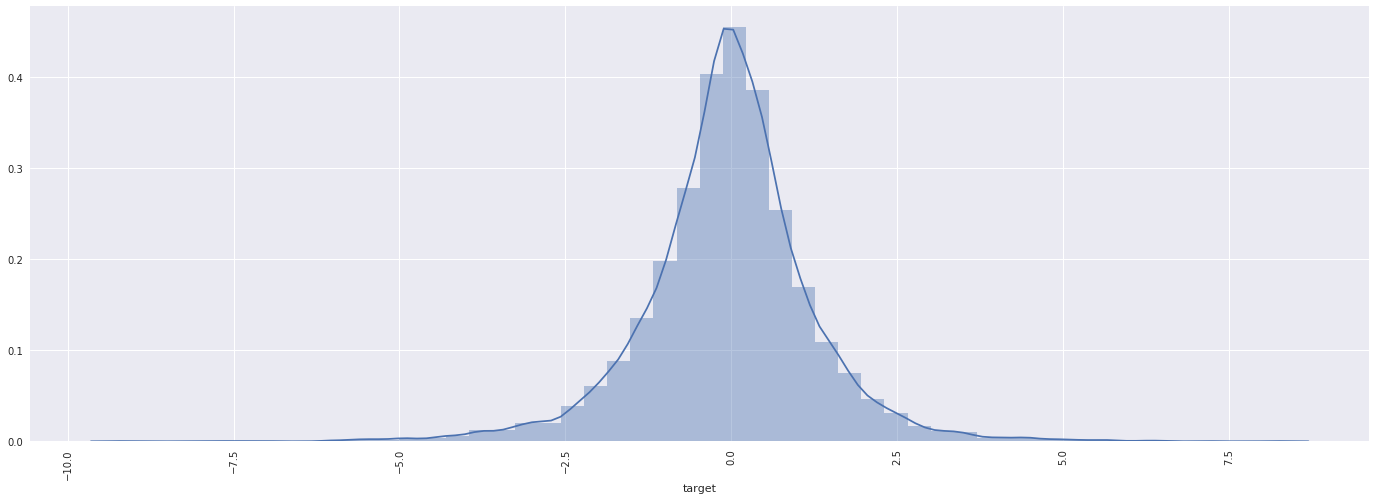

In [18]:
df = df_train
# df = df_test

# tmp = df[df['first_active_month']==f'2017-12']
# tmp = df[df['first_active_month']==f'2017-11']

for i in range(1, 13, 1):
    if i<10:
        df = df_train.copy()
        tmp = df[df['first_active_month']==f'2017-0{i}']
    else:
        df = df_train.copy()
        tmp = df[df['first_active_month']==f'2017-{i}']
    
    print(f"2017-{i}")
    print(tmp[target].max())
    print(tmp[target].min())
    plt.figure(figsize=(24, 8))
    sns.distplot(a=tmp['target'])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df = df_train.ko
plt.figure(figsize=(24, 8))
sns.lmplot(data=df, x='first_active_month', order=first_months)
plt.xticks(rotation=90)
sys.exit()
